In [1]:
import numpy as np
from dirmaths import *

1. Propriétés des relations binaires

1.1 Construction des matrices test

In [2]:
M1 = np.array([[1,1,0],[1,1,0],[0,0,1]])
M2 = np.array([[1,1,1],[1,0,0],[0,0,1]])
M3 = np.array([[1,1,1],[0,1,1],[0,0,1]])
M4 = np.array([[1,0,1],[0,0,0],[0,0,0]])

1.2 Exercice : réflexivité

In [3]:
def reflexive(M)->bool:
    res=True
    i=0
    while i <len(M) and res:
        res=M[i][i]==1
        i+=1
    return res
print(reflexive(M1),reflexive(M2),reflexive(M3),reflexive(M4))

True False True False


1.3 Exercice : symétrie et antisymétrie

In [4]:
def symetrique(M)->bool:
    res=True
    i=0
    while i <len(M) and res:
        j=0
        while j<i and res:
            res=M[i][j]==M[j][i]
            j+=1
        i+=1
    return res
print(symetrique(M1),symetrique(M2),symetrique(M3),symetrique(M4))
def antisymetrique(M)->bool:
    res=True
    i=0
    while i <len(M) and res:
        j=0
        while j<i and res:
            res=(M[i][j]!=M[j][i])or(M[i][j]==0)
            j+=1
        i+=1
    return res
print(antisymetrique(M1),antisymetrique(M2),antisymetrique(M3),antisymetrique(M4))

True False False False
False False True True


1.4 Exercice : transitivité

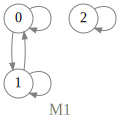

In [6]:
display(M1,title="M1",dispo="dot")
# Transitif

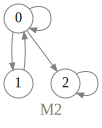

In [7]:
display(M2,title="M2",dispo="dot")
# Non Transitif

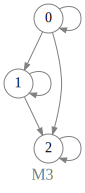

In [8]:
display(M3,title="M3", dispo="dot")
# Transitif

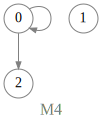

In [9]:
display(M4,title="M4", dispo="dot")
# Transitif

Un graphe G est dit transitif si la propriété suivante est vérifiée : 

pour tous i,j,k, G(i,j)=1 et G(j,k)=1 implique que G(i,k)=1

Créer une fonction transitive(M) en utilisant la définition de la transitivité.

In [25]:
def transitive(M):
    res=True
    i=0
    while i<len(M) and res:
        j=0
        while j<len(M) and res:
            k=0
            while k<len(M) and res:
                res=not(M[i][j]==1 and M[j][k]==1) or M[i][k]==1
                k+=1
            j+=1
        i+=1
    return res


print(transitive(M1),transitive(M2),transitive(M3),transitive(M4))

True False True True


On rappelle qu'une matrice M est transitive ssi : M=M+M2

Créer une fonction transitive(M), qui utilise la propriété précédente, et tester la 
sur les matrices Mi.

In [22]:
def transitive2(M)->bool:
    M2=np.dot(M,M)
    res=True
    i=0
    while i<len(M) and res:
        j=0
        while j<len(M) and res:
            res=((bool(M[i][j]))==(bool(M[i][j])or bool(M2[i][j])))
            j+=1
        i+=1
    return res
print(transitive2(M1),transitive2(M2),transitive2(M3),transitive2(M4))

True False True True


In [11]:
def puissance(A,p):
    B=A.copy()
    for i in range(p-1):
        A=np.dot(A,B)
    return A

2. Fermeture transitive

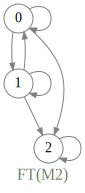

In [19]:
# Construire une fonction FT(M) qui retourne la fermeture 
# transitive d'une matrice d'adjacence M en utilisant la matrice M∗.
def FT(M):
    LMat=[M]
    for i in range(len(M)-1):
        LMat.append(puissance(M,i+2))
    MT=np.zeros((len(M),len(M)))
    for i in range(len(M)):
        for j in range(len(M)):
            AreteX=0
            for Mat in LMat:
                AreteX+=Mat[i][j]
            MT[i][j]=AreteX!=0
    return MT
display(FT(M2),title="FT(M2)",dispo="dot")

3) Relation binaire particulière

3.1 Relation d'équivalence

In [16]:
# Créer une fonction equivalence(M) qui, pour une matrice 
# booléene donnée M, renvoie True si la relation binaire associée 
# est une relation d'equivalence, False sinon.
def equivalence(M):
    return reflexive(M) and symetrique(M) and transitive(M)
print(equivalence(M1),equivalence(M2),equivalence(M3))

True False False


3.2 Relation d'ordre

In [17]:
# Créer une fonction ordre(M) qui, pour une matrice booléene donnée 
# M, renvoie True si la relation binaire associée est une relation 
# d'ordre, False sinon.
def ordre(M):
    return reflexive(M) and antisymetrique(M) and transitive(M)
print(ordre(M1),ordre(M2),ordre(M3))

False False True


3.3 Bonus : diagramme de Hasse

[[1. 0. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]] True



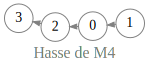

In [35]:
# Créer une fonction hasse(M) qui, pour une matrice booléene donnée 
# M de relation d'ordre, renvoie la matrice du diagramme de Hasse 
# associé à M.
def hasse(M):
    M2=M.copy()
    for i in range(len(M2)):
        M2[i][i]=M[i][i]=0
    for i in range(len(M)):
        for j in range(len(M)):
            for k in range(len(M)):
                if M[i][j]==1 and M[j][k]==1 and M[i][k]==1:
                    M2[i][k]=0
    return M2
M4=np.zeros((4,4))
M4[0,0]=M4[0,2]=M4[0,3]=1
M4[1,0]=M4[1,1]=M4[1,2]=M4[1,3]=1
M4[2,2]=M4[2,3]=1
M4[3,3]=1
print(M4, ordre(M4))
print()
display(hasse(M4),title="Hasse de M4")

[[1 1 1 1 1 1 1 1]
 [0 1 0 1 0 1 0 1]
 [0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 1]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]


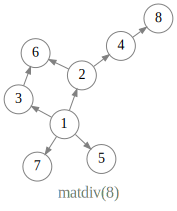

In [40]:
def divisés(n,maximum):
    div=[]
    for i in range(1,maximum+1):
        if i%n==0:
            div.append(1)
        else:
            div.append(0)
    return div




# Créer une fonction matdiv(n) retournant la matrice d'adjacence 
# de la relation "divise" sur les nombres entiers 1, 2, ..., n.
def matdiv(n):
    L=[]
    for i in range(n):
        L.append(i+1)
    LMat1=[]
    for elt in L:
        LMat1.append(divisés(elt,n))
    return np.array(LMat1)
print(matdiv(8))
display(hasse(matdiv(8)), label=[1,2,3,4,5,6,7,8], title="matdiv(8)")